In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as rege


#Model liberaies 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
#load the datas
#meta = pd.read_csv("../metadata.csv",usecols=['ID','Deposit','RatePerUnit','DaysOnDeposit','TotalContractValue','ExpectedTermDate','FirstPaymentDate','LastPaymentDate'])
train_data = pd.read_csv('../Train.csv')
test_data =  pd.read_csv('../Test.csv')


In [3]:
train_data

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0
...,...,...,...,...,...,...,...,...,...
28002,ID_CDZ24L9,"['03-2018', '04-2018', '05-2018', '06-2018', '...","[5235.0, 1270.0, 940.0, 1370.0, 2020.0, 1750.0...",1640.0,1550.0,2045.0,850.0,1730.0,720.0
28003,ID_0XINELS,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2980.0, 1000.0, 450.0, 1050.0, 850.0, 1250.0,...",900.0,950.0,650.0,750.0,1200.0,620.0
28004,ID_PAU9JJU,"['01-2020', '02-2020', '03-2020', '04-2020', '...","[2580.0, 1020.0, 540.0, 360.0, 200.0, 660.0, 1...",680.0,460.0,799.0,1070.0,820.0,401.0
28005,ID_K866QHS,"['02-2018', '03-2018', '04-2018', '05-2018', '...","[2000.0, 1160.0, 1240.0, 1120.0, 1000.0, 1200....",1300.0,1055.0,1200.0,1200.0,1080.0,800.0


In [4]:
test_data

,ID,TransactionDates,PaymentsHistory
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."
...,...,...,...
9331,ID_ATLMXQX,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2690.0, 270.0, 770.0, 1100.0, 700.0, 550.0, 5..."
9332,ID_DYMC72D,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2950.0, 1550.0, 1500.0, 900.0, 80.0, 1550.0, ..."
9333,ID_5CBGHCN,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2550.0, 500.0, 550.0, 250.0, 200.0, 450.0, 45..."
9334,ID_HYHB585,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2700.0, 800.0, 250.0, 300.0, 1100.0, 950.0, 8..."


In [5]:
# sample the train data 
# sample the test data
sample_train_data= train_data.iloc[:200,:]
sample_test_data= test_data.iloc[:200,:]

In [6]:
#Get each ID with amount they paid over the 36 months  
pattern = rege.compile(r"\d{1,2}.\d{1,4}");
paymentAmounTrain = {values:[float(match) for match in pattern.findall(sample_train_data['PaymentsHistory'][keys]) ] for keys,values in enumerate(sample_train_data['ID'])}
paymentAmounTest = {values:[float(match) for match in pattern.findall(sample_test_data['PaymentsHistory'][keys]) ] for keys,values in enumerate(sample_test_data['ID'])}

#Get each ID with transactions dates  
pattern = rege.compile(r"\d{1,2}.\d{1,4}")
trans_dataWithIdTrain = {values:[ pd.to_datetime(match) for match in pattern.findall(sample_train_data['TransactionDates'][keys])] for keys,values in enumerate(sample_train_data['ID'])}
trans_dataWithIdTest = {values:[ pd.to_datetime(match) for match in pattern.findall(sample_train_data['TransactionDates'][keys])] for keys,values in enumerate(sample_train_data['ID'])}

In [7]:
trans_dataWithIdTest['ID_MR53LEX']

[Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-

In [7]:
#trans_dataWithId

In [12]:
paymentAmounTrain['ID_MR53LEX'],paymentAmounTrain['ID_MR53LEX']

([3600.0,
  750.0,
  350.0,
  65.0,
  95.0,
  135.0,
  85.0,
  55.0,
  345.0,
  155.0,
  55.0,
  630.0,
  585.0,
  185.0,
  440.0,
  483.0,
  660.0,
  515.0,
  292.0,
  505.0,
  210.0,
  120.0,
  260.0,
  610.0,
  230.0,
  390.0,
  660.0,
  1200.0,
  1320.0,
  280.0,
  770.0],
 [3600.0,
  750.0,
  350.0,
  65.0,
  95.0,
  135.0,
  85.0,
  55.0,
  345.0,
  155.0,
  55.0,
  630.0,
  585.0,
  185.0,
  440.0,
  483.0,
  660.0,
  515.0,
  292.0,
  505.0,
  210.0,
  120.0,
  260.0,
  610.0,
  230.0,
  390.0,
  660.0,
  1200.0,
  1320.0,
  280.0,
  770.0])

In [25]:
# Plot dates and payment paid over the period 

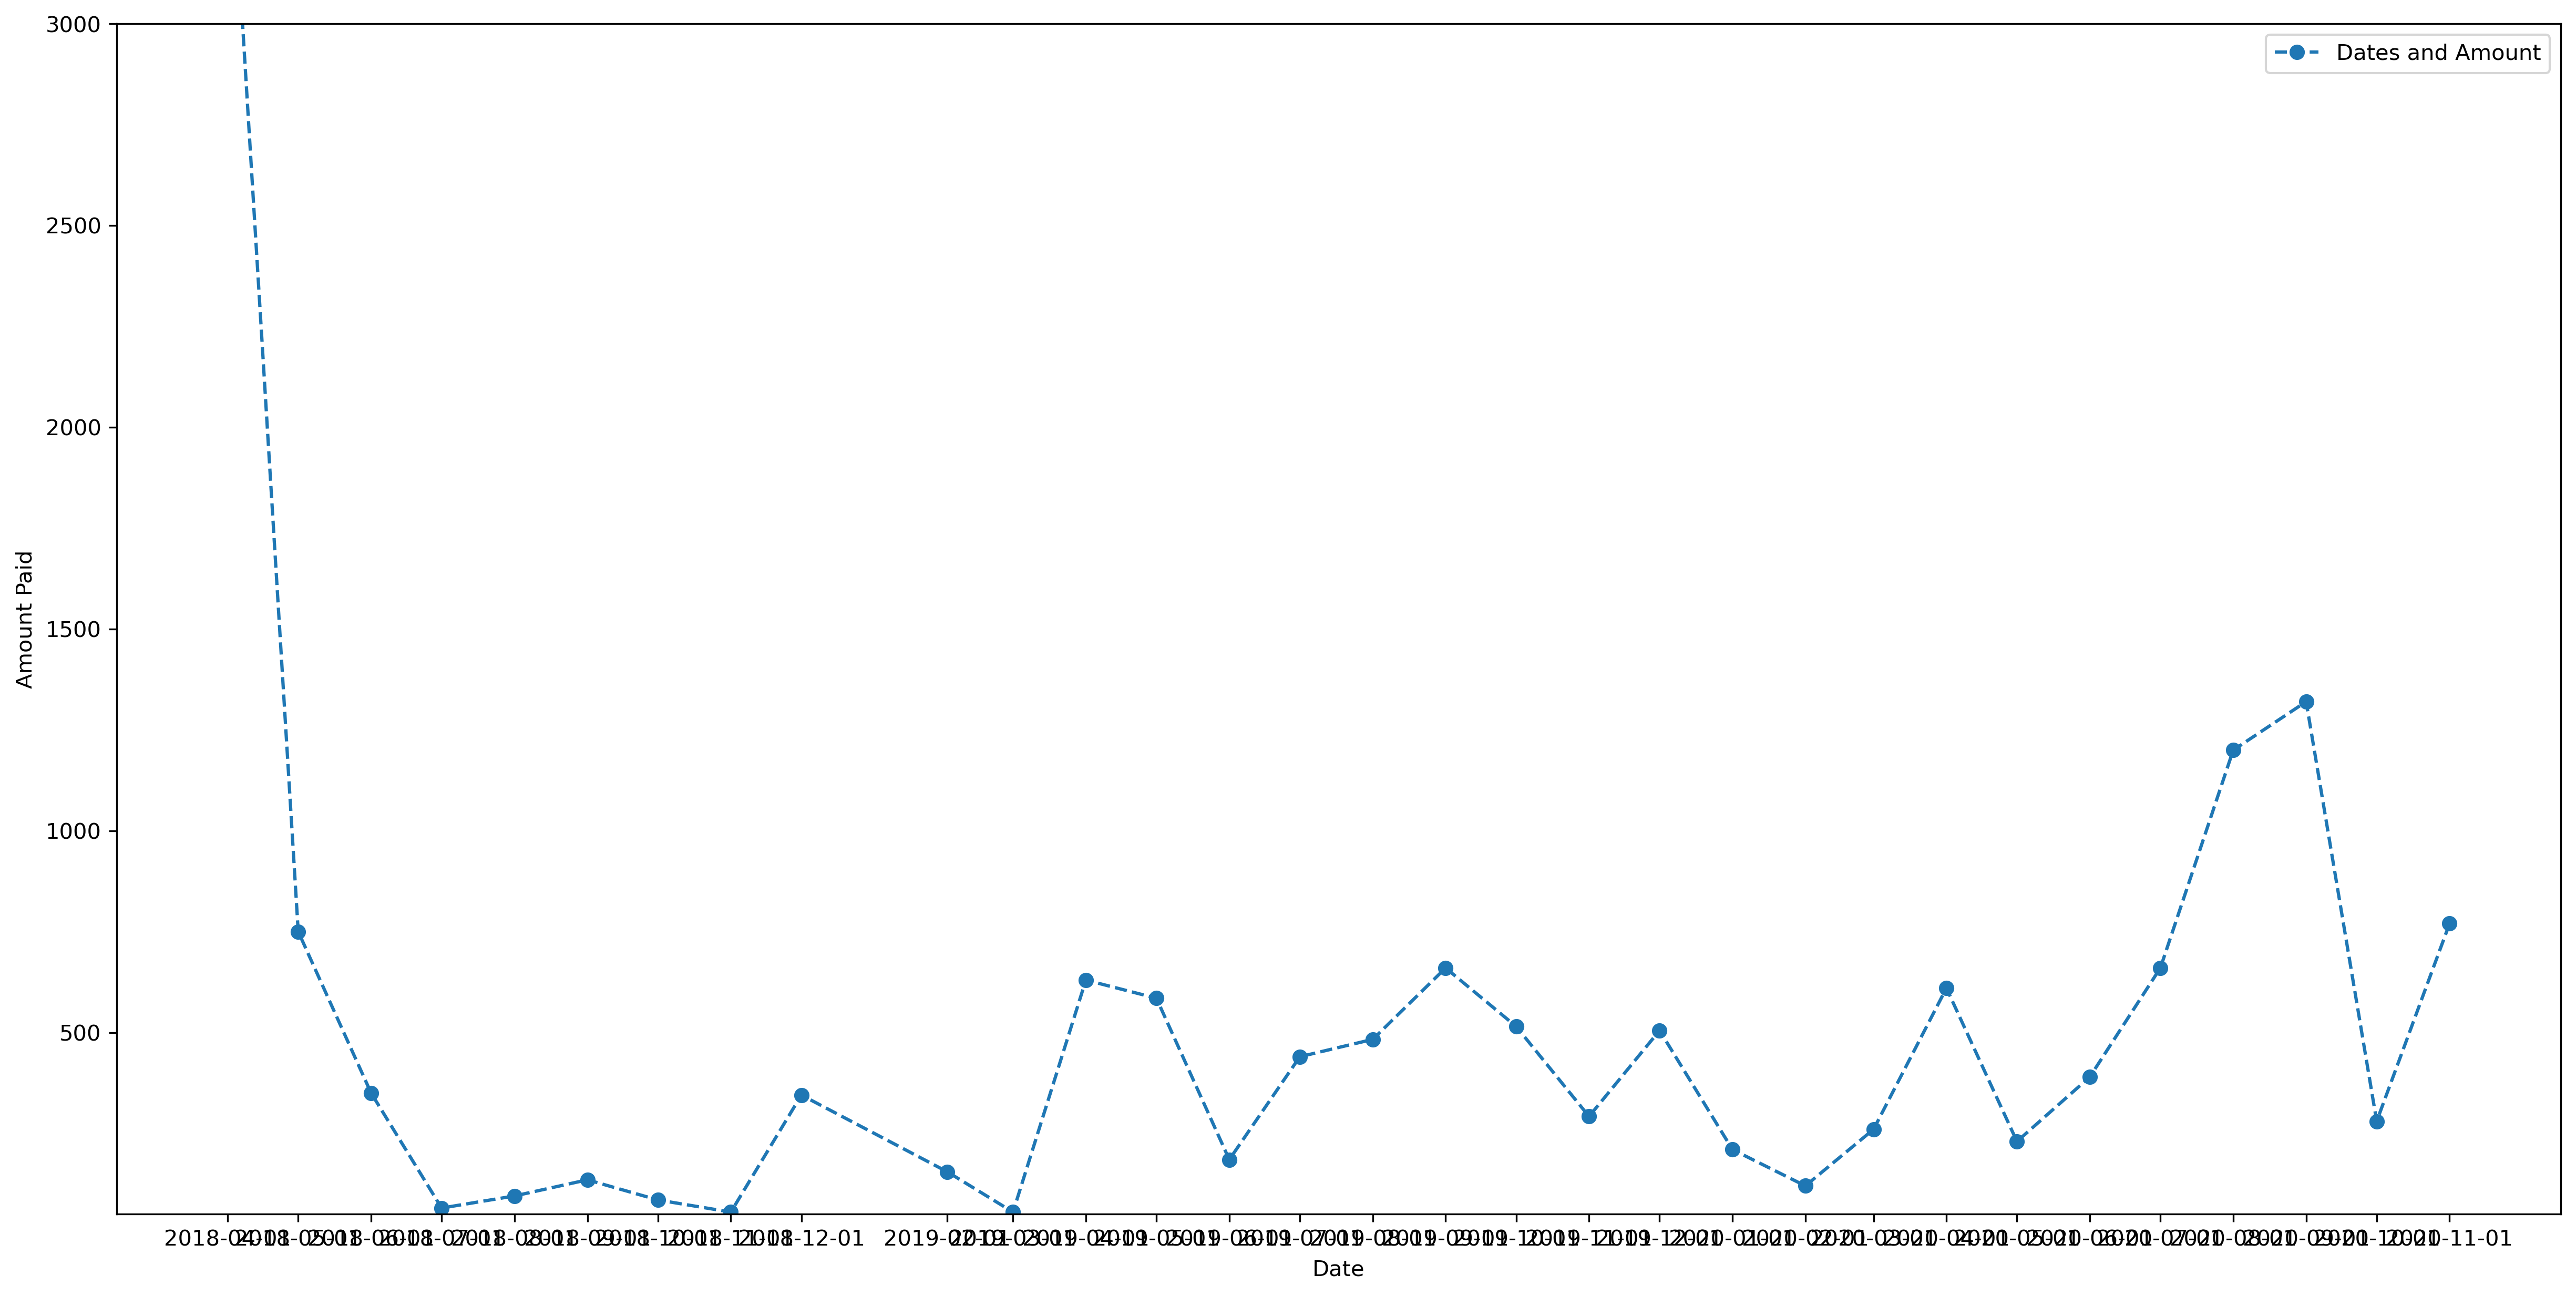

In [15]:
x = trans_dataWithIdTrain['ID_MR53LEX']
y = paymentAmounTrain['ID_MR53LEX']

plt.figure(figsize=(20,10),dpi=300)
plt.plot_date(x,y,linestyle='--',label='ID_7OU9HLK')
plt.xticks(x)
plt.ylabel('Amount Paid')
plt.xlabel('Date')
plt.legend(['Dates and Amount'])
plt.ylim(50,3000,100)
#plt.
plt.show()

In [54]:
# Explorary Data Analysis 

In [16]:
sample_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                200 non-null    object 
 1   TransactionDates  200 non-null    object 
 2   PaymentsHistory   200 non-null    object 
 3   m1                200 non-null    float64
 4   m2                200 non-null    float64
 5   m3                200 non-null    float64
 6   m4                200 non-null    float64
 7   m5                200 non-null    float64
 8   m6                200 non-null    float64
dtypes: float64(6), object(3)
memory usage: 14.2+ KB


In [17]:
sample_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                200 non-null    object
 1   TransactionDates  200 non-null    object
 2   PaymentsHistory   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [18]:
sample_train_data

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0
...,...,...,...,...,...,...,...,...,...
195,ID_SPD3JWB,"['11-2017', '12-2017', '01-2018', '02-2018', '...","[2000.0, 1020.0, 80.0, 320.0, 690.0, 500.0, 62...",330.0,230.0,320.0,140.0,370.0,425.0
196,ID_W2MJXO2,"['03-2018', '04-2018', '05-2018', '06-2018', '...","[3825.0, 1595.0, 1430.0, 1100.0, 165.0, 180.0,...",1560.0,1720.0,1098.0,1685.0,1520.0,1466.0
197,ID_A8DGE28,"['03-2018', '04-2018', '05-2018', '06-2018', '...","[3944.0, 1200.0, 820.0, 204.0, 50.0, 70.0, 90....",385.0,770.0,219.0,605.0,400.0,110.0
198,ID_20XBZP3,"['08-2017', '09-2017', '10-2017', '11-2017', '...","[2400.0, 1320.0, 1040.0, 1080.0, 1280.0, 1160....",1240.0,1160.0,1240.0,1160.0,1240.0,1120.0


In [68]:
#Convert the dictionary transactionDates and Payment to DataFrame 

In [33]:
dataframePaymentAmounTrain = pd.DataFrame(paymentAmounTrain.values(),index=paymentAmounTrain.keys())
dataframeTranDates = pd.DataFrame(trans_dataWithIdTrain.values(),index=trans_dataWithIdTrain.keys())
dataframePaymentAmounTest =  pd.DataFrame(paymentAmounTest.values(),index=paymentAmounTest.keys())
dataframeTranDatesTest = pd.DataFrame([trans_dataWithIdTest.values()],index=trans_dataWithIdTest.keys())

In [20]:
dataframeTranDatesTest

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
ID_MR53LEX,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-02-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_3D7NQUH,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,...,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_0IWQNPI,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_IY8SYB9,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_9XHL7VZ,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_SPD3JWB,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,...,2020-02-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_W2MJXO2,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_A8DGE28,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_20XBZP3,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [21]:
dataframePaymentAmounTrain

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
ID_MR53LEX,3600.0,750.0,350.0,65.0,95.0,135.0,85.0,55.0,345.0,155.0,...,1200.0,1320.0,280.0,770.0,NaN,NaN,NaN,NaN,NaN,NaN
ID_3D7NQUH,2940.0,970.0,380.0,880.0,385.0,440.0,1100.0,605.0,550.0,605.0,...,660.0,655.0,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_0IWQNPI,2850.0,1500.0,1350.0,610.0,200.0,250.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_IY8SYB9,2200.0,1420.0,1180.0,900.0,1400.0,780.0,1300.0,1100.0,600.0,380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_9XHL7VZ,2640.0,910.0,480.0,280.0,200.0,180.0,330.0,200.0,370.0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_SPD3JWB,2000.0,1020.0,80.0,320.0,690.0,500.0,620.0,800.0,1080.0,670.0,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_W2MJXO2,3825.0,1595.0,1430.0,1100.0,165.0,180.0,55.0,1210.0,1375.0,1154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_A8DGE28,3944.0,1200.0,820.0,204.0,50.0,70.0,90.0,50.0,155.0,155.0,...,318.0,480.0,385.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN
ID_20XBZP3,2400.0,1320.0,1040.0,1080.0,1280.0,1160.0,1120.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dataframeTranDates

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
ID_MR53LEX,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-02-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_3D7NQUH,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,...,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_0IWQNPI,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_IY8SYB9,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_9XHL7VZ,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_SPD3JWB,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,...,2020-02-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_W2MJXO2,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_A8DGE28,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_20XBZP3,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [23]:
dataframeTranDatesTest

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
ID_MR53LEX,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-02-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_3D7NQUH,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,...,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_0IWQNPI,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_IY8SYB9,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_9XHL7VZ,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_SPD3JWB,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,...,2020-02-01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_W2MJXO2,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
ID_A8DGE28,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,...,2020-08-01,2020-09-01,2020-10-01,2020-11-01,NaT,NaT,NaT,NaT,NaT,NaT
ID_20XBZP3,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [46]:
dataframePaymentAmounTrain.isna().sum()

0       0
1       0
2       0
3       0
4       0
5      13
6      28
7      40
8      60
9      69
10     75
11     80
12     85
13     95
14    102
15    109
16    110
17    115
18    124
19    132
20    139
21    142
22    146
23    149
24    152
25    154
26    156
27    163
28    165
29    170
30    173
31    178
32    187
33    189
34    194
35    197
36    199
dtype: int64

In [47]:
dataframePaymentAmounTrain.fillna(0,inplace=True)

In [48]:
dataframePaymentAmounTest.fillna(0,inplace=True)

In [76]:
sample_train_data.loc[:,'m1']

0       880.0
1       660.0
2       700.0
3       580.0
4        40.0
        ...  
195     330.0
196    1560.0
197     385.0
198    1240.0
199    1200.0
Name: m1, Length: 200, dtype: float64

In [91]:
#split the data 
x = dataframePaymentAmounTest.iloc[:,:6]
y = sample_train_data.loc[:,'m1']
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=12)

In [78]:
X_train.shape, X_test.shape

((160, 6), (40, 6))

In [79]:
y_train.shape , y_test.shape

((160,), (40,))

In [80]:
X_train.shape,y_train.shape

((160, 6), (160,))

In [81]:
X_test

,0,1,2,3,4,5
ID_H68TG44,2820.0,820.0,1200.0,1360.0,830.0,1290.0
ID_0VN23N0,2560.0,1270.0,1248.0,1080.0,1160.0,1240.0
ID_BNYM56N,3000.0,785.0,845.0,1085.0,800.0,1090.0
ID_1O7QCGV,2600.0,960.0,1040.0,80.0,280.0,160.0
ID_3F67SN6,4840.0,300.0,1400.0,1100.0,500.0,850.0
ID_J010YKX,2320.0,480.0,1120.0,1000.0,570.0,560.0
ID_MMX4UDJ,2000.0,860.0,920.0,1140.0,1280.0,1240.0
ID_SX3ERIL,2520.0,1160.0,1200.0,1080.0,740.0,980.0
ID_7F9D87T,2700.0,540.0,340.0,200.0,200.0,80.0
ID_R25OAJ3,2200.0,40.0,200.0,120.0,200.0,200.0


In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression()

In [95]:
model.coef_

array([-0.05953315, -0.04515268, -0.0754077 ,  0.14915673,  0.00028794,
       -0.12373806])

In [96]:
model.intercept_

1118.62545137596

In [97]:
model.predict(X_test)

array([ 868.05254694,  862.79157926,  867.75435854,  837.43847493,
        857.45658222,  835.84547665,  775.13719466,  888.71170489,
        860.64304497,  744.84222417,  825.81826848,  767.20114392,
        811.40758114, 1018.727443  ,  846.23219148,  948.61642573,
        885.7297161 ,  869.4749954 ,  782.1125236 ,  735.69557972,
        639.41441445,  840.22248983,  939.20774378,  923.72751729,
        999.18856256,  989.54570449,  919.16370109,  895.81948572,
        924.5463559 ,  835.55699058,  665.51743615,  918.24367873,
        821.04469359,  953.66468546,  835.5924195 ,  777.46129841,
        866.69756503,  950.61764296,  914.34011568,  649.21949486])

In [89]:
#squeeze the data 
y_pred = np.squeeze(model.predict(X_test))

In [104]:
y_pred.shape

TypeError: 'tuple' object is not callable

In [99]:
mean_absolute_error(y_test,y_pred)

431.84042017410485

In [100]:
mean_squared_error(y_test,y_pred)

272479.8990393582

In [101]:
r2_score(y_test,y_pred)

-0.007390359867613938